# EDSA - Climate Change Belief Analysis 2022
© Explore Data Science Academy

---
### Honour Code

We {**Team 10**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Predict an individual’s belief in climate change based on historical tweet data


Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Classification Metrics</a>

<a href=#five>5. Modeling and Model Improvements</a>

<a href=#six>6. Classifier Model Selection</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [26]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [27]:
#Read the train data and view the first few entries
df = pd.read_csv('train.csv', index_col=0)
df.head()

,message,tweetid
sentiment,,
1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,It's not like we lack evidence of anthropogeni...,126103
2,RT @RawStory: Researchers say we have three ye...,698562
1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 1 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  15819 non-null  object
 1   tweetid  15819 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


We observed that our dataset has 3 columns and a total of 15,819 rows. We also observed the dataset contains two numerical varibles and one categorical variable. We also observed that the size of the data is 370.9+ KB.

In [29]:
df.describe()

,tweetid
count,15819.000000
mean,501719.433656
std,289045.983132
min,6.000000
25%,253207.500000
50%,502291.000000
75%,753769.000000
max,999888.000000


From the dataset, we've been able to see the mean and a statistical summary of the dataset. We hae also observed that the minimum value of the sentiment is **-1** while the maximum value is **2**

In [30]:
df.message.describe().T

count                                                 15819
unique                                                14229
top       RT @StephenSchlegel: she's thinking about how ...
freq                                                    307
Name: message, dtype: object

We observed that there were **14,229** unique values out of the total of **15,819**

In [31]:
#Checking for null objects in train data
df.isnull().sum()

message    0
tweetid    0
dtype: int64

It is interesting to know that the dataset has no null values which means all entries were appropriately recorded.

In [32]:
df.skew()

tweetid   -0.008471
dtype: float64

Skewness indicate how symmetricall the data is. The feature tweetid is **fairly symmetrical.**

In [33]:
df.kurtosis()

tweetid   -1.193356
dtype: float64

Kurtosis measures the outliers in the data. The feature tweetid lack outliers

Sentiment and tweetid = Weak negative correlation

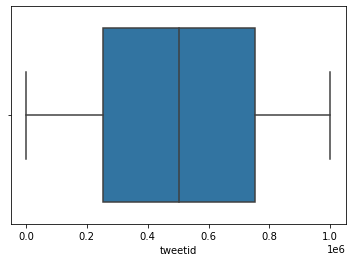

In [34]:
sns.boxplot(x='tweetid', data=df);

**Text Cleaning**

Removing Noise to get our data to a usable format. We will remove punctuation, make all words lowercase and remove any web urls.

In [39]:
#remove urls 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['no url'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [40]:
#remove punctuation
import string
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [41]:
df['no punct'] = df['no url'].apply(remove_punctuation)

Make lowercase

In [42]:
df['lower'] = df['no punct'].str.lower()

Remove Stopwords

In [43]:
from nltk.corpus import stopwords
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [44]:
df['stopwords'] = df['lower'].apply(remove_stop_words)

Tokenisation

In [45]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

Stemming

In [46]:
from nltk import SnowballStemmer

In [47]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [48]:
df['stem'] = df['tokens'].apply(df_stemmer, args=(stemmer, ))

Lemmatisation

In [49]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dianaokeyo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
df['lemma'] = df['tokens'].apply(df_lemma, args=(lemmatizer, ))

Count Vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


# remove English stop words
vect = CountVectorizer(stop_words='english')

# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)


# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

vect.fit(df['message'])

CountVectorizer(min_df=2)

In [63]:
df.message.head()

sentiment
1    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
1    #TodayinMaker# WIRED : 2016 was a pivotal year...
1    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

<a id="four"></a>
## 4. Classification Metrics
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Logistic Regression 

In [68]:
# labels
y = df['tweetid']

# features
X = df.drop('tweetid', axis=1)

In [69]:
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

Our data is now ready. Let's train the logistic regression model.

**Training**


In [16]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.intercept_[0]

<a id="five"></a>
## 5. Modelling and Model Improvements
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="six"></a>
## 6. Classifier Model Selection
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---